In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import sys
import datetime
sys.path.insert(1, "C:/sers/jaege/PycharmProjects/labour-katharina")
from labor_katharina import contraction_features_02
#from labor_katharina.StatisticalTest import regression, permutation
import datetime
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [2]:
users = pd.read_pickle('./data/04/users-04.pkl')
recordings = pd.read_pickle('./data/04/recordings-04.pkl')
contractions = pd.read_pickle('./data/04/contractions-04.pkl')
auc = pd.read_pickle('./data/auc.pkl')

In [3]:
#filtering out contractions that are longer than
duration_threshold = pd.Timedelta(np.timedelta64(150, 's'))
contractions_q = contractions[contractions['duration'] < duration_threshold]

print('Number of contractions before filtering: ', len(contractions))
print('Number of contractions after filtering: ', len(contractions_q))
print('Percentage of contractions left: ', len(contractions_q)/len(contractions))

Number of contractions before filtering:  192164
Number of contractions after filtering:  178866
Percentage of contractions left:  0.9307986927832477


In [4]:
# compute features
window_size = 3600
corner = False
features = contraction_features_02.extract(recordings, contractions_q, auc, window_size, corner=corner)

0 / 4689
1 / 4689
2 / 4689
3 / 4689
4 / 4689
5 / 4689
6 / 4689
7 / 4689
8 / 4689
9 / 4689
10 / 4689
11 / 4689
12 / 4689
13 / 4689
14 / 4689
15 / 4689
16 / 4689
17 / 4689
18 / 4689
19 / 4689
20 / 4689
21 / 4689
22 / 4689
23 / 4689
24 / 4689
25 / 4689
26 / 4689
27 / 4689
28 / 4689
29 / 4689
30 / 4689
31 / 4689
32 / 4689
33 / 4689
34 / 4689
35 / 4689
36 / 4689
37 / 4689
38 / 4689
39 / 4689
40 / 4689
41 / 4689
42 / 4689
43 / 4689
44 / 4689
45 / 4689
46 / 4689
47 / 4689
48 / 4689
49 / 4689
50 / 4689
51 / 4689
52 / 4689
53 / 4689
54 / 4689
55 / 4689
56 / 4689
57 / 4689
58 / 4689
59 / 4689
60 / 4689
61 / 4689
62 / 4689
63 / 4689
64 / 4689
65 / 4689
66 / 4689
67 / 4689
68 / 4689
69 / 4689
70 / 4689
71 / 4689
72 / 4689
73 / 4689
74 / 4689
75 / 4689
76 / 4689
77 / 4689
78 / 4689
79 / 4689
80 / 4689
81 / 4689
82 / 4689
83 / 4689
84 / 4689
85 / 4689
86 / 4689
87 / 4689
88 / 4689
89 / 4689
90 / 4689
91 / 4689
92 / 4689
93 / 4689
94 / 4689
95 / 4689
96 / 4689
97 / 4689
98 / 4689
99 / 4689
100 / 4689

755 / 4689
756 / 4689
757 / 4689
758 / 4689
759 / 4689
760 / 4689
761 / 4689
762 / 4689
763 / 4689
764 / 4689
765 / 4689
766 / 4689
767 / 4689
768 / 4689
769 / 4689
770 / 4689
771 / 4689
772 / 4689
773 / 4689
774 / 4689
775 / 4689
776 / 4689
777 / 4689
778 / 4689
779 / 4689
780 / 4689
781 / 4689
782 / 4689
783 / 4689
784 / 4689
785 / 4689
786 / 4689
787 / 4689
788 / 4689
789 / 4689
790 / 4689
791 / 4689
792 / 4689
793 / 4689
794 / 4689
795 / 4689
796 / 4689
797 / 4689
798 / 4689
799 / 4689
800 / 4689
801 / 4689
802 / 4689
803 / 4689
804 / 4689
805 / 4689
806 / 4689
807 / 4689
808 / 4689
809 / 4689
810 / 4689
811 / 4689
812 / 4689
813 / 4689
814 / 4689
815 / 4689
816 / 4689
817 / 4689
818 / 4689
819 / 4689
820 / 4689
821 / 4689
822 / 4689
823 / 4689
824 / 4689
825 / 4689
826 / 4689
827 / 4689
828 / 4689
829 / 4689
830 / 4689
831 / 4689
832 / 4689
833 / 4689
834 / 4689
835 / 4689
836 / 4689
837 / 4689
838 / 4689
839 / 4689
840 / 4689
841 / 4689
842 / 4689
843 / 4689
844 / 4689
845 / 4689

1460 / 4689
1461 / 4689
1462 / 4689
1463 / 4689
1464 / 4689
1465 / 4689
1466 / 4689
1467 / 4689
1468 / 4689
1469 / 4689
1470 / 4689
1471 / 4689
1472 / 4689
1473 / 4689
1474 / 4689
1475 / 4689
1476 / 4689
1477 / 4689
1478 / 4689
1479 / 4689
1480 / 4689
1481 / 4689
1482 / 4689
1483 / 4689
1484 / 4689
1485 / 4689
1486 / 4689
1487 / 4689
1488 / 4689
1489 / 4689
1490 / 4689
1491 / 4689
1492 / 4689
1493 / 4689
1494 / 4689
1495 / 4689
1496 / 4689
1497 / 4689
1498 / 4689
1499 / 4689
1500 / 4689
1501 / 4689
1502 / 4689
1503 / 4689
1504 / 4689
1505 / 4689
1506 / 4689
1507 / 4689
1508 / 4689
1509 / 4689
1510 / 4689
1511 / 4689
1512 / 4689
1513 / 4689
1514 / 4689
1515 / 4689
1516 / 4689
1517 / 4689
1518 / 4689
1519 / 4689
1520 / 4689
1521 / 4689
1522 / 4689
1523 / 4689
1524 / 4689
1525 / 4689
1526 / 4689
1527 / 4689
1528 / 4689
1529 / 4689
1530 / 4689
1531 / 4689
1532 / 4689
1533 / 4689
1534 / 4689
1535 / 4689
1536 / 4689
1537 / 4689
1538 / 4689
1539 / 4689
1540 / 4689
1541 / 4689
1542 / 4689
1543

2146 / 4689
2147 / 4689
2148 / 4689
2149 / 4689
2150 / 4689
2151 / 4689
2152 / 4689
2153 / 4689
2154 / 4689
2155 / 4689
2156 / 4689
2157 / 4689
2158 / 4689
2159 / 4689
2160 / 4689
2161 / 4689
2162 / 4689
2163 / 4689
2164 / 4689
2165 / 4689
2166 / 4689
2167 / 4689
2168 / 4689
2169 / 4689
2170 / 4689
2171 / 4689
2172 / 4689
2173 / 4689
2174 / 4689
2175 / 4689
2176 / 4689
2177 / 4689
2178 / 4689
2179 / 4689
2180 / 4689
2181 / 4689
2182 / 4689
2183 / 4689
2184 / 4689
2185 / 4689
2186 / 4689
2187 / 4689
2188 / 4689
2189 / 4689
2190 / 4689
2191 / 4689
2192 / 4689
2193 / 4689
2194 / 4689
2195 / 4689
2196 / 4689
2197 / 4689
2198 / 4689
2199 / 4689
2200 / 4689
2201 / 4689
2202 / 4689
2203 / 4689
2204 / 4689
2205 / 4689
2206 / 4689
2207 / 4689
2208 / 4689
2209 / 4689
2210 / 4689
2211 / 4689
2212 / 4689
2213 / 4689
2214 / 4689
2215 / 4689
2216 / 4689
2217 / 4689
2218 / 4689
2219 / 4689
2220 / 4689
2221 / 4689
2222 / 4689
2223 / 4689
2224 / 4689
2225 / 4689
2226 / 4689
2227 / 4689
2228 / 4689
2229

2831 / 4689
2832 / 4689
2833 / 4689
2834 / 4689
2835 / 4689
2836 / 4689
2837 / 4689
2838 / 4689
2839 / 4689
2840 / 4689
2841 / 4689
2842 / 4689
2843 / 4689
2844 / 4689
2845 / 4689
2846 / 4689
2847 / 4689
2848 / 4689
2849 / 4689
2850 / 4689
2851 / 4689
2852 / 4689
2853 / 4689
2854 / 4689
2855 / 4689
2856 / 4689
2857 / 4689
2858 / 4689
2859 / 4689
2860 / 4689
2861 / 4689
2862 / 4689
2863 / 4689
2864 / 4689
2865 / 4689
2866 / 4689
2867 / 4689
2868 / 4689
2869 / 4689
2870 / 4689
2871 / 4689
2872 / 4689
2873 / 4689
2874 / 4689
2875 / 4689
2876 / 4689
2877 / 4689
2878 / 4689
2879 / 4689
2880 / 4689
2881 / 4689
2882 / 4689
2883 / 4689
2884 / 4689
2885 / 4689
2886 / 4689
2887 / 4689
2888 / 4689
2889 / 4689
2890 / 4689
2891 / 4689
2892 / 4689
2893 / 4689
2894 / 4689
2895 / 4689
2896 / 4689
2897 / 4689
2898 / 4689
2899 / 4689
2900 / 4689
2901 / 4689
2902 / 4689
2903 / 4689
2904 / 4689
2905 / 4689
2906 / 4689
2907 / 4689
2908 / 4689
2909 / 4689
2910 / 4689
2911 / 4689
2912 / 4689
2913 / 4689
2914

3514 / 4689
3515 / 4689
3516 / 4689
3517 / 4689
3518 / 4689
3519 / 4689
3520 / 4689
3521 / 4689
3522 / 4689
3523 / 4689
3524 / 4689
3525 / 4689
3526 / 4689
3527 / 4689
3528 / 4689
3529 / 4689
3530 / 4689
3531 / 4689
3532 / 4689
3533 / 4689
3534 / 4689
3535 / 4689
3536 / 4689
3537 / 4689
3538 / 4689
3539 / 4689
3540 / 4689
3541 / 4689
3542 / 4689
3543 / 4689
3544 / 4689
3545 / 4689
3546 / 4689
3547 / 4689
3548 / 4689
3549 / 4689
3550 / 4689
3551 / 4689
3552 / 4689
3553 / 4689
3554 / 4689
3555 / 4689
3556 / 4689
3557 / 4689
3558 / 4689
3559 / 4689
3560 / 4689
3561 / 4689
3562 / 4689
3563 / 4689
3564 / 4689
3565 / 4689
3566 / 4689
3567 / 4689
3568 / 4689
3569 / 4689
3570 / 4689
3571 / 4689
3572 / 4689
3573 / 4689
3574 / 4689
3575 / 4689
3576 / 4689
3577 / 4689
3578 / 4689
3579 / 4689
3580 / 4689
3581 / 4689
3582 / 4689
3583 / 4689
3584 / 4689
3585 / 4689
3586 / 4689
3587 / 4689
3588 / 4689
3589 / 4689
3590 / 4689
3591 / 4689
3592 / 4689
3593 / 4689
3594 / 4689
3595 / 4689
3596 / 4689
3597

4198 / 4689
4199 / 4689
4200 / 4689
4201 / 4689
4202 / 4689
4203 / 4689
4204 / 4689
4205 / 4689
4206 / 4689
4207 / 4689
4208 / 4689
4209 / 4689
4210 / 4689
4211 / 4689
4212 / 4689
4213 / 4689
4214 / 4689
4215 / 4689
4216 / 4689
4217 / 4689
4218 / 4689
4219 / 4689
4220 / 4689
4221 / 4689
4222 / 4689
4223 / 4689
4224 / 4689
4225 / 4689
4226 / 4689
4227 / 4689
4228 / 4689
4229 / 4689
4230 / 4689
4231 / 4689
4232 / 4689
4233 / 4689
4234 / 4689
4235 / 4689
4236 / 4689
4237 / 4689
4238 / 4689
4239 / 4689
4240 / 4689
4241 / 4689
4242 / 4689
4243 / 4689
4244 / 4689
4245 / 4689
4246 / 4689
4247 / 4689
4248 / 4689
4249 / 4689
4250 / 4689
4251 / 4689
4252 / 4689
4253 / 4689
4254 / 4689
4255 / 4689
4256 / 4689
4257 / 4689
4258 / 4689
4259 / 4689
4260 / 4689
4261 / 4689
4262 / 4689
4263 / 4689
4264 / 4689
4265 / 4689
4266 / 4689
4267 / 4689
4268 / 4689
4269 / 4689
4270 / 4689
4271 / 4689
4272 / 4689
4273 / 4689
4274 / 4689
4275 / 4689
4276 / 4689
4277 / 4689
4278 / 4689
4279 / 4689
4280 / 4689
4281

In [5]:
features.to_pickle('./data/06/features-06.pkl')
contractions_q.to_pickle('./data/06/contractions-06.pkl')

In [6]:
features['gestational_age'] = [((sw.date()-dd).days+280.0)/7.0 for sw,dd in zip(features['start_window'], users.loc[recordings.loc[features['session_id'], 'user_id'], 'due_date'])]
feature_names = ['count', 'duration_median', 'duration_iqr', 'duration_rmssd',
                                     'auc_median', 'auc_iqr', 'auc_rmssd', 'variability', 'regularity_0', 'regularity_1',
                                     'regularity_2' , 'regularity_e', 'rmssd', 'gestational_age']
# cast to float
for feature in feature_names:
    features[feature] = pd.to_numeric(features[feature],errors='coerce')

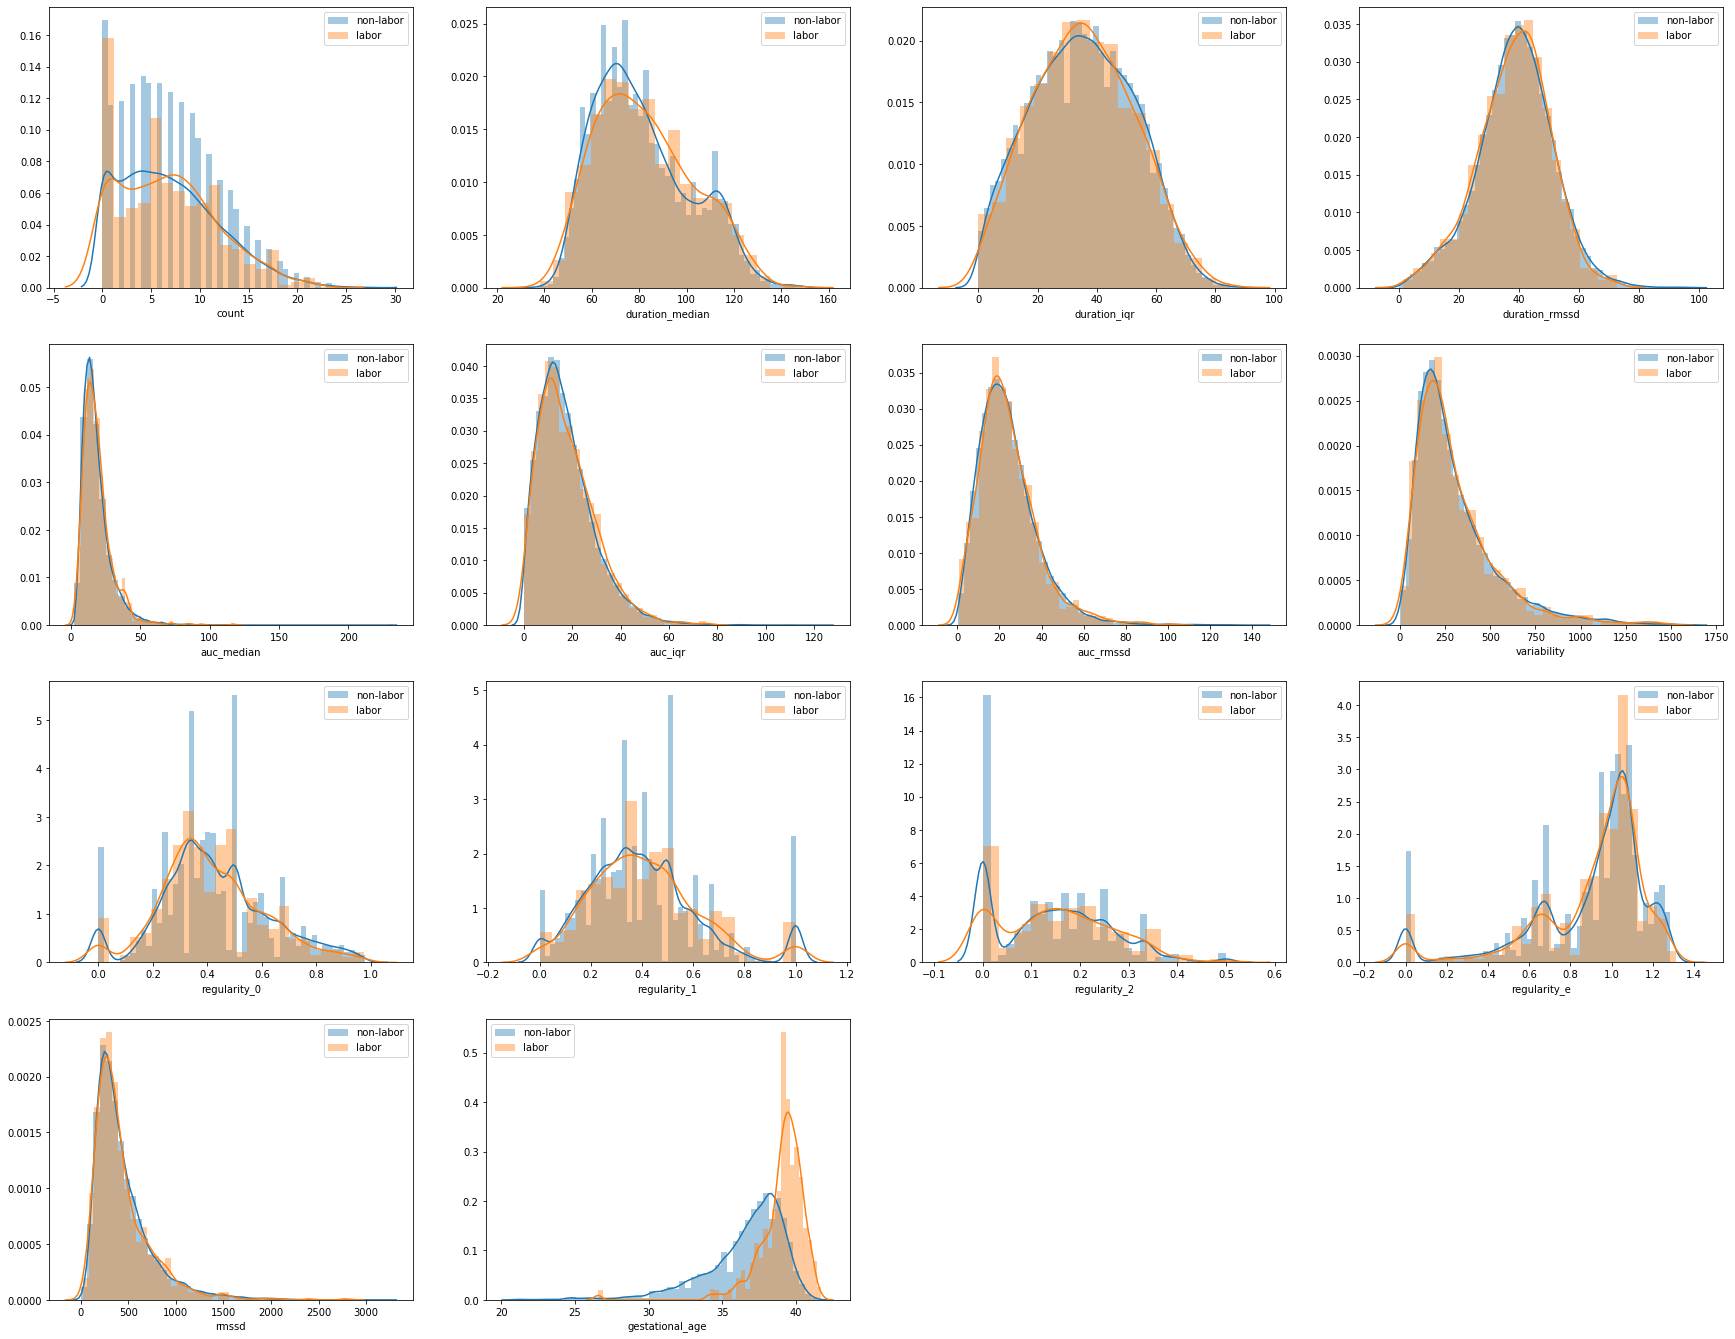

In [7]:
fig = plt.figure(figsize= (30,30))
fig.suptitle('', fontsize=30)

for i, feature in enumerate(feature_names):
    ax = plt.subplot(5,4,i+1)
    f_nl = features[features['labor']==0][feature]
    feature_noNan_nl = f_nl[~np.isnan(f_nl)]
    sns.distplot(feature_noNan_nl, hist=True, kde=True, label='non-labor')
    
    f_l = features[features['labor']==1][feature]
    feature_noNan_l = f_l[~np.isnan(f_l)]
    sns.distplot(feature_noNan_l, hist=True, kde=True, label='labor')
    plt.legend()

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


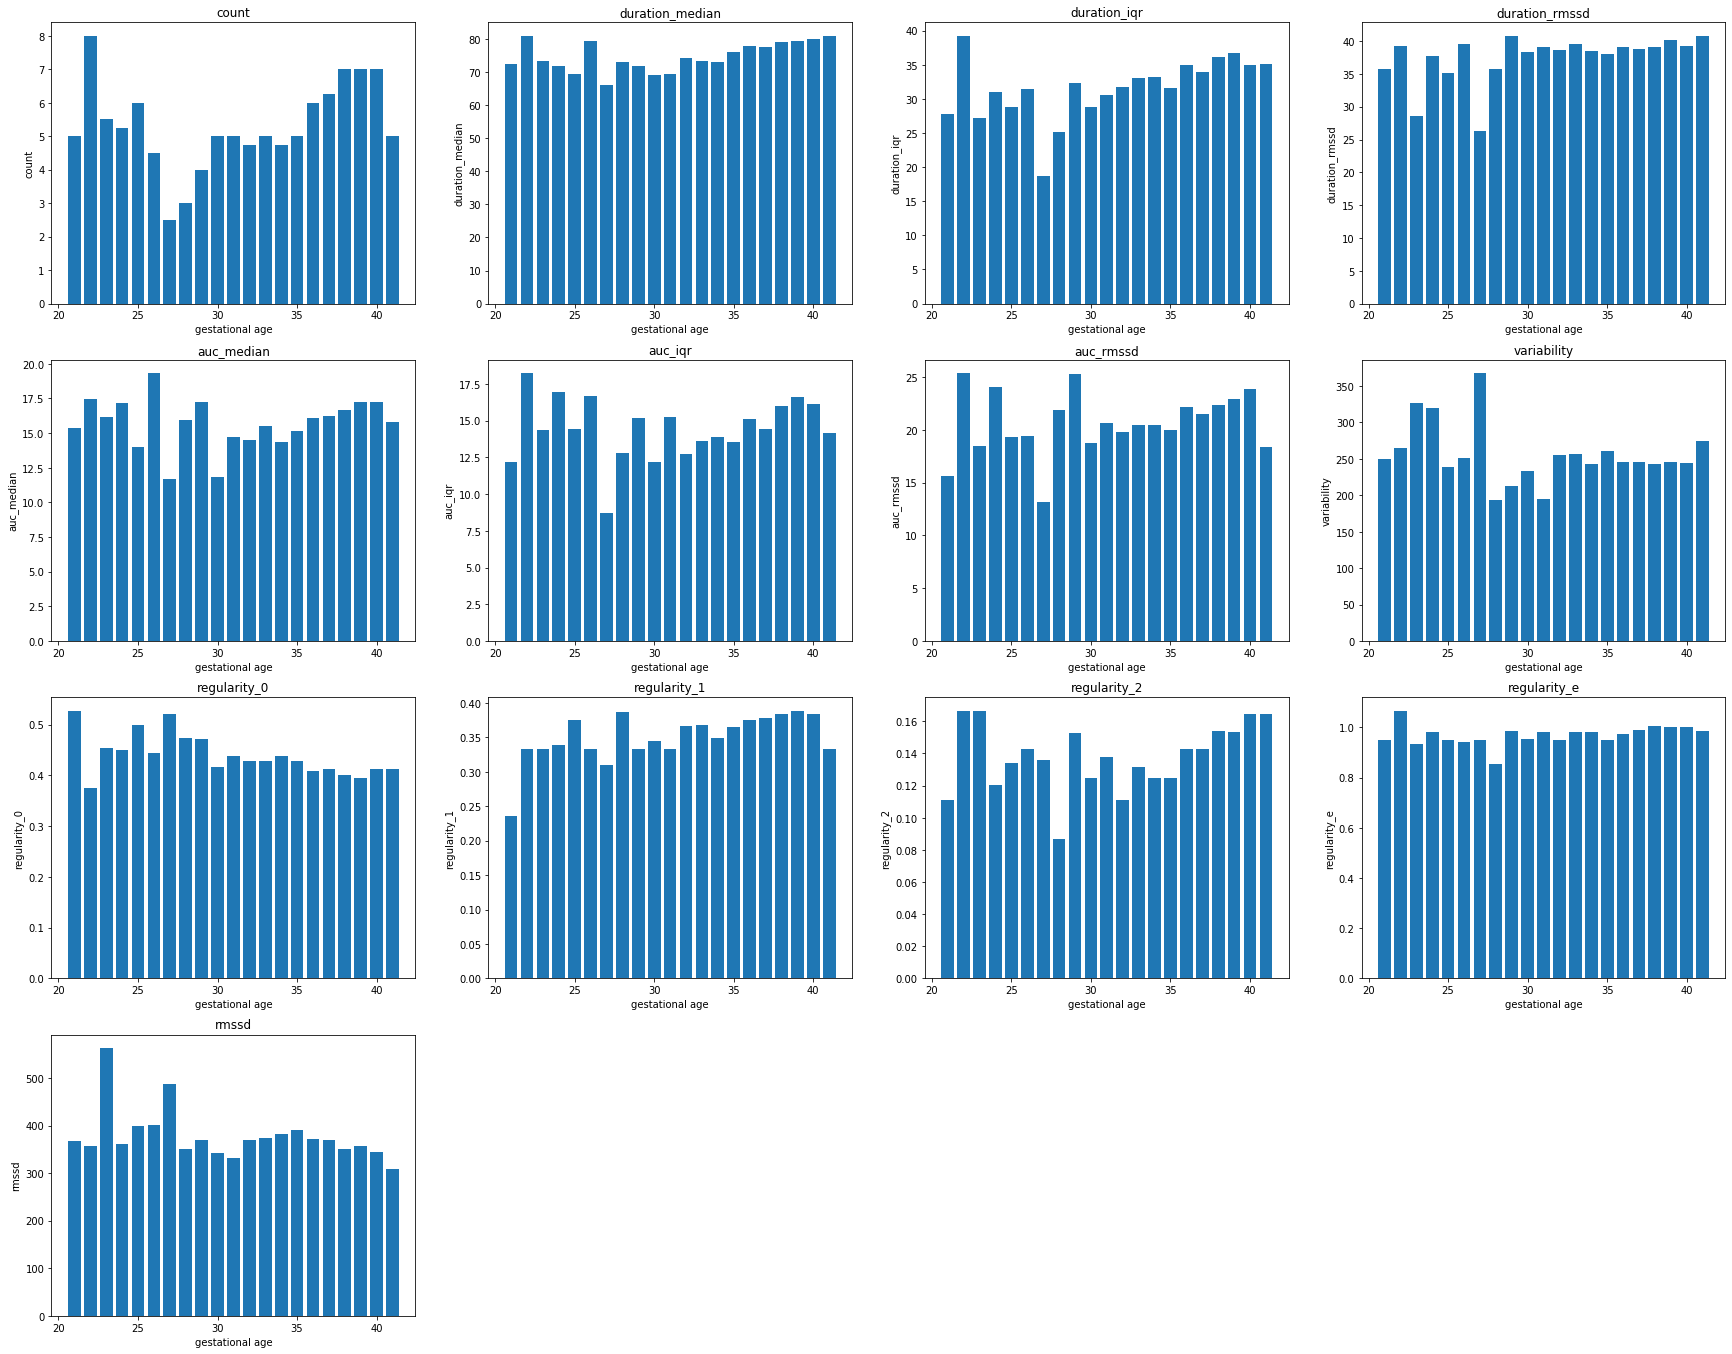

In [8]:
feature_names = ['count', 'duration_median', 'duration_iqr', 'duration_rmssd',
                                     'auc_median', 'auc_iqr', 'auc_rmssd', 'variability', 'regularity_0', 'regularity_1',
                                     'regularity_2' , 'regularity_e', 'rmssd']
fig = plt.figure(figsize= (30,30))
fig.suptitle('', fontsize=30)

for i, f in enumerate(feature_names):
    ax = plt.subplot(5,4,i+1)
    f_tmp = features[[f, 'gestational_age', 'user_id']]
    f_tmp['gestational_age'] = f_tmp['gestational_age'].apply(np.floor) 
    tmp = f_tmp.groupby(['gestational_age', 'user_id']).median()
    bar = tmp.groupby('gestational_age').median()
    plt.bar(bar.index.values, bar[f])
    plt.ylabel(f)
    plt.xlabel('gestational age')
    plt.title(f)

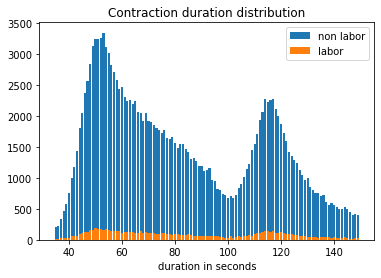

In [9]:
durs = contractions_q[contractions_q['labor'] == 0]['duration'].dt.total_seconds()
x, count = np.unique(durs, return_counts=True);
plt.bar(x, count, color='C0', label='non labor')
plt.xlabel('duration in seconds')

durs = contractions_q[contractions_q['labor'] == 1]['duration'].dt.total_seconds()
x, count = np.unique(durs, return_counts=True);
plt.bar(x, count, color='C1', label='labor')
plt.xlabel('duration in seconds')
plt.legend()
plt.title('Contraction duration distribution');

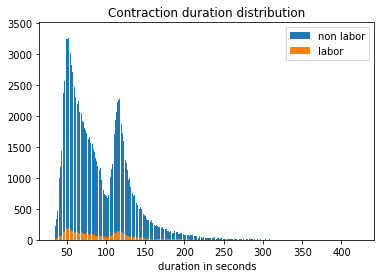

In [10]:
durs = contractions[contractions['labor'] == 0]['duration'].dt.total_seconds()
x, count = np.unique(durs, return_counts=True);
plt.bar(x, count, color='C0', label='non labor')
plt.xlabel('duration in seconds')

durs = contractions[contractions['labor'] == 1]['duration'].dt.total_seconds()
x, count = np.unique(durs, return_counts=True);
plt.bar(x, count, color='C1', label='labor')
plt.xlabel('duration in seconds')
plt.legend()
plt.title('Contraction duration distribution');